# Лабораторная работа 1. Работа с библиотекой Numpy

Осипенко Д. В., 5.406М

In [1]:
# импортируем необходимые библиотеки и функции
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e в формате svg
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

**Задание 1.** Создайте одномерный вектор `a` целых значений от $l_1$ до $l_2$ включительно. На его основе вычислите следующие вектора и матрицы (размер вектора равен $n = l_2 - l_1 + 1$):

* одномерный вектор длины $n$, состоящий из элементов `a`, расположенных в обратном порядке;
* одномерный вектор длины $n$, состоящий из значений 0 и 1, в котором значение 1 соотвествует элементам, делящимся на 3 в исходном векторе `a`;
* двумерную матрицу-строку размера 1 на $n$, содержащую элементы вектора `a`;
* двумерную матрицу-столбец размера $n$ на 1, содержащую элементы вектора `a`;
* двумерную матрицу размера $n$ на $n$, содержащую все попарные произведения элементов вектора `a`;
* двумерную матрицу размера $n+2$ на $n+2$, основанную на матрице из предыдущего пункта и дополненную "бордюром" из нулей, окружающим ненулевые значения;
* двумерную матрицу размера $n$ на $n$, содержащую элементы вектора `a` на побочной диагонали;
* двумерную матрицу размера $n$ на 3, содержащую повторяющиеся значения из вектора `a` в её столбцах;
* двумерную матрицу размера 5 на $n$, содержащую повторяющиеся значения из вектора `a` в её строках.

Каждый из пунктов должен выводить на экран соответствующее значение.

In [2]:
# ваш код здесь
l1, l2 = 3, 9
n = l2-l1+1
a = np.linspace(l1, l2, n, dtype=int)
print("a: ", a)
print("#1: ", np.flip(a))
print("#2: ", np.array([i % 3 == 0 for i in a], dtype=int))
print("#3: ", a.reshape((1,n)))
print("#4: ", a.reshape((n,1)))
t1 = a.reshape((1,n))*a.reshape((n,1))
print("#5: ", t1)
print("#6: ", np.pad(t1, [(1,1)]))
print("#7: ", np.rot90(np.diag(np.flip(a))))
print("#8: ", np.tile(a.reshape((n,1)), 3))
print("#9: ", np.tile(a.reshape((1,n)), (5,1)))

a:  [3 4 5 6 7 8 9]
#1:  [9 8 7 6 5 4 3]
#2:  [1 0 0 1 0 0 1]
#3:  [[3 4 5 6 7 8 9]]
#4:  [[3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
#5:  [[ 9 12 15 18 21 24 27]
 [12 16 20 24 28 32 36]
 [15 20 25 30 35 40 45]
 [18 24 30 36 42 48 54]
 [21 28 35 42 49 56 63]
 [24 32 40 48 56 64 72]
 [27 36 45 54 63 72 81]]
#6:  [[ 0  0  0  0  0  0  0  0  0]
 [ 0  9 12 15 18 21 24 27  0]
 [ 0 12 16 20 24 28 32 36  0]
 [ 0 15 20 25 30 35 40 45  0]
 [ 0 18 24 30 36 42 48 54  0]
 [ 0 21 28 35 42 49 56 63  0]
 [ 0 24 32 40 48 56 64 72  0]
 [ 0 27 36 45 54 63 72 81  0]
 [ 0  0  0  0  0  0  0  0  0]]
#7:  [[0 0 0 0 0 0 3]
 [0 0 0 0 0 4 0]
 [0 0 0 0 5 0 0]
 [0 0 0 6 0 0 0]
 [0 0 7 0 0 0 0]
 [0 8 0 0 0 0 0]
 [9 0 0 0 0 0 0]]
#8:  [[3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]
 [8 8 8]
 [9 9 9]]
#9:  [[3 4 5 6 7 8 9]
 [3 4 5 6 7 8 9]
 [3 4 5 6 7 8 9]
 [3 4 5 6 7 8 9]
 [3 4 5 6 7 8 9]]


**Задание 2.** Создайте двумерную матрицу `X` размера $n$ на $m$, содержащую случайные величины, распределенные нормально (по гауссовому распределению) со средним $\mu = 0$ и и среднеквадратичным отклонением $\sigma = 1$. Используйте для этого генератор из модуля `numpy.random`. Сделайте следующее:

* Вычислите двумерную матрицу размера $n$ на $m$, в которой все отрицательные значения заменены на 0;
* Вычислите двумерную матрицу `Y` размера $n$ на $m$, каждый элемент которой вычисляется следующим образом: $y_{ij} = sin(x_{ij}) + cos(x_{ji})$;
* Предложите не менее четырех способов выделения целочисленной части из значений матрицы `X`;
* Вычислите двумерную матрицу размера $n$ на 3, содержащую в первом столбце суммы элементов, во втором столбце средние значения, а в третьем столбце среднеквадратичные отклонения для каждой строки матрицы `X`.

In [3]:
# ваш код здесь
n, m = 4, 5
mu, sigma = 0, 1
X = np.random.default_rng().normal(mu, sigma, size=(n, m)).reshape(n, m)
print("X: ", X)
print("#1: ",np.where(X<0, 0, X))
Y = np.sin(X) + np.cos(X)
print("#2: ", Y)
print("#3.1: ", X.astype(np.int32))
print("#3.2: ", np.trunc(X))
print("#3.3: ", np.fix(X))
print("#3.4: ", np.array(X, dtype=int))
print("#4: ", np.hstack((
    np.sum(X, 1),
    np.average(X, 1),
    np.std(X, 1)
)).reshape((n,3)))

X:  [[ 0.33820561  2.12049887  1.67584963  0.78609196 -0.07707837]
 [ 0.78306154 -0.04651353  1.01827365  1.42592309 -0.20187993]
 [ 1.06093676  0.94239313  0.28550801 -1.13000807 -1.63013573]
 [-0.63100557  1.29209119 -0.39456695  0.74236995  0.3959441 ]]
#1:  [[0.33820561 2.12049887 1.67584963 0.78609196 0.        ]
 [0.78306154 0.         1.01827365 1.42592309 0.        ]
 [1.06093676 0.94239313 0.28550801 0.         0.        ]
 [0.         1.29209119 0.         0.74236995 0.3959441 ]]
#2:  [[ 1.27514644  0.33024634  0.8896268   1.41421322  0.92002886]
 [ 1.4142097   0.95242168  1.37603945  1.13389121  0.77917993]
 [ 1.36086773  1.39682097  1.24116363 -0.47776312 -1.05754452]
 [ 0.21747769  1.23652346  0.53875467  1.41290461  1.30831227]]
#3.1:  [[ 0  2  1  0  0]
 [ 0  0  1  1  0]
 [ 1  0  0 -1 -1]
 [ 0  1  0  0  0]]
#3.2:  [[ 0.  2.  1.  0. -0.]
 [ 0. -0.  1.  1. -0.]
 [ 1.  0.  0. -1. -1.]
 [-0.  1. -0.  0.  0.]]
#3.3:  [[ 0.  2.  1.  0. -0.]
 [ 0. -0.  1.  1. -0.]
 [ 1.  0.  0. 

**Задание 3.** Постройте вектор размера $n$ элементов, заполненный случайными нормально распределенными числами, распределенными со средним равным $\mu$ и среднеквадратичным отклонением $\sigma$. Постройте гистограмму эмпирического распределения при помощи функции `matplotlib.pyplot.hist`. Приведите аргументы, касающиеся выбора оптимального числа карманов (`bins`) при построении гистограммы.

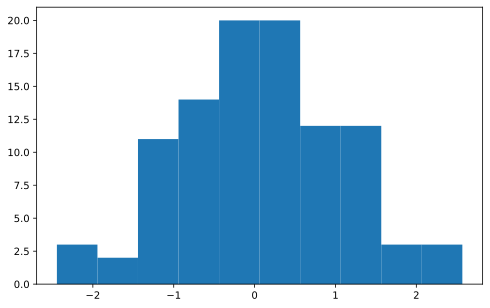

In [4]:
# ваш код здесь
n = 100
mu, sigma = 0, 1
X = np.random.default_rng().normal(mu, sigma, size=n)
plt.hist(X, bins='auto')
plt.show()

**Задание 4.** Вычислите так называемую случайную матрицу Вигнера $W$ размера $n \times n$. Для этого вычислите случайную матрицу $X$ из нормально распределенных чисел (размера $n$ на $n$, $\mu=0$, $\sigma=1$). Матрица $W$ определяется формулой: $$ \frac {(X + X^T)}{\sqrt{2n}}.$$ Вычислите среднее значение и среднеквадратичное отклонение элементов полученной матрицы $W$. 

In [5]:
# ваш код здесь
n = 4
mu, sigma = 0, 1
X = np.random.default_rng().normal(mu, sigma, size=n**2).reshape((n,n))
W = (X + X.T)/(np.sqrt(2*n))
print("W: ", W)
print(f"Avg: {np.average(W)}, STD: {np.std(W)}")

W:  [[ 0.51763648  0.42238413 -0.20250572  0.03684082]
 [ 0.42238413 -0.50923895 -0.46102287 -0.70900515]
 [-0.20250572 -0.46102287 -1.16456222 -0.46920215]
 [ 0.03684082 -0.70900515 -0.46920215 -0.07136342]]
Avg: -0.24953437350209887, STD: 0.4475350332193576


**Задание 5.** Повторите 1000 раз следующий эксперимент: сгенерируйте две матрицы размера $n \times n$ из стандартного нормального распределения, перемножьте их (обычным матричным умножением) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 25- и 75-процентные квантили? Постройте в виде гистограммы распределение максимальных элементов. Для вычисления квантили воспользуйтесь функцией `np.percentile`

Avg -> 1.9758489343625898
25% -> 1.208698658614834
75% -> 2.442829029114367


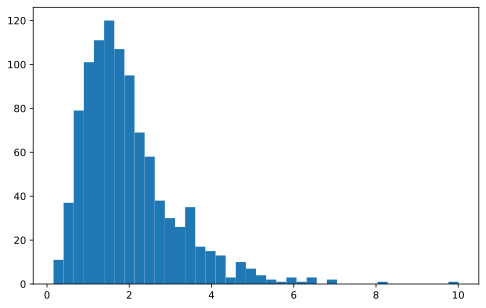

In [6]:
# ваш код здесь
n = 4
mu, sigma = 0, 1
vals = []
for _ in range(1000):
    X1 = np.random.default_rng().normal(mu, sigma, size=n**2).reshape((n,n))
    X2 = np.random.default_rng().normal(mu, sigma, size=n**2).reshape((n,n))
    vals.append(np.max(X1*X2))
print(f"Avg -> {np.average(vals)}")
print(f"25% -> {np.percentile(vals, 25)}")
print(f"75% -> {np.percentile(vals, 75)}")
plt.hist(vals, bins='auto')
plt.show()


**Задание 6.** Сгенерируйте $n$ чисел из распределения Пуассона с параметром $\lambda$. Сформируйте массив, в котором в i-м элементе будет записано количество сгенерированных чисел, равных i. Постройте гистограмму эмпирического распределения. Реализуйте функцию, которая принимает на вход numpy-массив целых чисел a (подобный полученному), и генерирует массив, в котором число i встречается a[i] раз.

**Подсказка:** обратите внимание на функции `np.bincount` и `np.repeat`

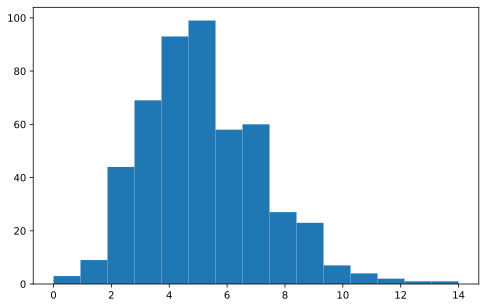

repeats:  [ 0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  6  6  6  6  6  6  6  6  

In [7]:
# ваш код здесь
n = 500
lam = 5.
X = np.random.poisson(lam, n)
freq = np.bincount(X)
plt.hist(X, len(freq))
plt.show()

def repeat(a: np.ndarray):
    return np.repeat(np.arange(len(freq)), freq)

print("repeats: ", repeat(freq))

**Задание 7.** Напишите функцию `scale(X)`, которая принимает на вход двумерную матрицу произвольного размера и масштабирует каждый ее столбец (вычитает среднее и делит полученные значения на стандартное отклонение, вычисленные для всех элементов данного столбца). Учтите случай деления на нулевое значение (добавьте к стандартному отклонению малую константу порядка $10^{-6}$). Загрузите и перемасштабируйте таблицу с векторами признаков из встроенного набора `"Wine recognition dataset"` [https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset ]

In [8]:
# ваш код здесь
def scale(X: np.ndarray):
    return (X - np.average(X, 0)) / (np.std(X, 0) + 1e-6)

print(scale(datasets.load_wine()["data"]))

[[ 1.51861067 -0.56224929  0.23205169 ...  0.36217569  1.84791696
   1.01300892]
 [ 0.24628932 -0.49941293 -0.8279933  ...  0.40604888  1.11344773
   0.96524152]
 [ 0.19687879  0.02123123  1.1093303  ...  0.31830249  0.78858634
   1.39514817]
 ...
 [ 0.33275776  1.74474292 -0.38935399 ... -1.61211807 -1.48544338
   0.28057537]
 [ 0.20923142  0.22769357  0.01273204 ... -1.56824488 -1.40069693
   0.29649783]
 [ 1.39508432  1.5831637   1.36520323 ... -1.52437168 -1.42894575
  -0.59516041]]


**Задание 8.** Постройте в виде набора `scatter`-графиков различные пары признаков из отнормированных данных предыдущего задания. Обратите внимание, что набор данных `"Wine recognition dataset"` представляет собой словарь. Найдите в нём названия признаков объектов и разметку объектов по меткам классов и используйте их для оформления графиков. Какие из полученных графиков по вашему мнению наиболее информативны? Почему?

In [9]:
# ваш код здесь
wine = datasets.load_wine()
X = scale(wine["data"])
# print(wine["DESCR"])
# for x in range(12):
#     for y in range(x + 1, 13):
#         for k in range(len(wine["target_names"])):
#             plt.scatter(
#                 X[wine["target"] == k, x],
#                 X[wine["target"] == k, y],
#                 label=wine["target_names"][k]
#             )
#             plt.xlabel(wine["feature_names"][x])
#             plt.ylabel(wine["feature_names"][y])
#             plt.legend()
        # plt.show()

**Задание 9.** Реализуйте функцию, вычисляющую коэффициенты линейной регрессии $a_1$ и $a_0$ для зависимости вида $y_i(x)=a_1 x_i + a_0$. Для этого обратитесь к материалу второй лекции курса, где был разобран подобный пример. На вход функция должна принимать два вектора $x$ и $y$. Результат работы должен представлять два значения коэффициентов $a_1$ и $a_0$.

In [10]:
# ваш код здесь
def linRegCoef(x, y):
    n = len(x)
    Sy = np.sum(y)
    Sx = np.sum(x)
    
    a1 = (n * np.sum(x*y) - Sx*Sy)/(n * np.sum(x**2) - Sx**2)
    a0 = (Sy - a1 * Sx) / n
    return a1, a0


size = 10
for i in range(10):
    x = np.random.rand(size)
    y = np.random.rand(size)
    a0, a1 = linRegCoef(x, y)
    print(f"#{i}:")
    print(f"x={x.round(2)}")
    print(f"y={y.round(2)}")
    print(f"a1={a1}\ta0={a0}\n")

#0:
x=[0.23 0.18 0.47 0.49 0.04 0.3  0.6  0.45 0.54 0.57]
y=[0.55 0.73 0.75 0.84 0.8  0.23 0.39 0.13 0.81 0.21]
a1=0.7000509003468103	a0=-0.4053750776568182

#1:
x=[0.82 0.48 0.37 0.13 0.39 0.64 0.88 0.62 0.22 0.59]
y=[0.84 0.39 0.1  0.89 0.27 0.37 0.17 0.77 0.71 0.82]
a1=0.6310636417415518	a0=-0.18952326213668727

#2:
x=[0.46 0.03 0.12 0.82 0.3  0.01 0.43 0.67 0.5  0.44]
y=[0.87 0.27 0.77 0.78 0.84 0.95 0.47 0.92 0.07 0.25]
a1=0.5997011539406406	a0=0.047975487934719334

#3:
x=[0.34 0.29 0.67 0.15 0.12 0.64 0.06 0.14 0.34 0.22]
y=[0.07 0.13 0.42 0.57 0.68 0.81 0.12 0.56 0.15 0.83]
a1=0.3884723037271068	a0=0.14969352138146377

#4:
x=[0.77 0.57 0.17 0.26 0.73 0.86 0.05 0.44 0.97 0.56]
y=[0.28 0.51 0.94 0.68 0.09 0.92 0.49 0.51 0.02 0.15]
a1=0.723713961689684	a0=-0.4936803158737342

#5:
x=[0.42 0.25 0.9  0.07 0.66 0.38 0.44 0.58 0.62 0.09]
y=[0.82 0.61 0.92 0.52 0.74 0.67 0.09 0.53 0.11 0.61]
a1=0.49038178531220566	a0=0.16165424041676565

#6:
x=[0.85 0.48 0.55 0.15 0.51 0.33 0.28 0.84 0.4

**Задание 10.** Примените функцию из предыдущего пункта для предсказания того, как прогрессирует диабет у пациентов из набора данных `"Diabetes dataset"`[https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset ] Для этого загрузите этот набор. В качестве $x$ используйте значения признака индекса массы тела (`bmi`), в качестве $y$ - значения по ключу `target`. Вычислите коэффициенты $a_1$ и $a_0$. Постройте график с осью абсцисс, отвечающей за значения `bmi`, осью ординат со значениями `target`. В виде 442 точек нанесите примеры из загруженных данных, в виде прямой представьте предсказания модели. Подпишите оси координат и метки значений на осях

a1=949.4352603840385	a0=152.13348416289614



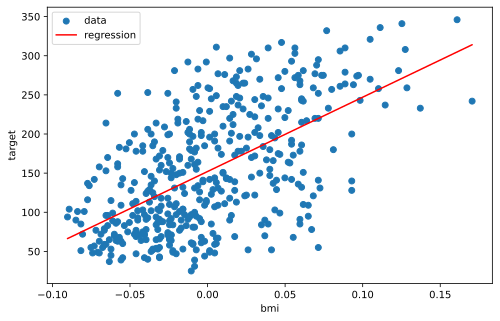

In [11]:
# ваш код здесь
diabetes = datasets.load_diabetes()
# print(diabetes["DESCR"])

x = diabetes["data"][:, np.newaxis, 2].flatten()
y = diabetes["target"]

a1, a0 = linRegCoef(x, y)
print(f"a1={a1}\ta0={a0}\n")

plt.scatter(x, y, label="data")
plt.plot(x, a1 * x + a0, color="red", label="regression")
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

In [80]:
n = 10
a = np.arange(0, n)
(np.resize(np.tile(a, n), (n,n))+ np.resize(a, (n,1))) % n + 1

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10,  1],
       [ 3,  4,  5,  6,  7,  8,  9, 10,  1,  2],
       [ 4,  5,  6,  7,  8,  9, 10,  1,  2,  3],
       [ 5,  6,  7,  8,  9, 10,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10,  1,  2,  3,  4,  5],
       [ 7,  8,  9, 10,  1,  2,  3,  4,  5,  6],
       [ 8,  9, 10,  1,  2,  3,  4,  5,  6,  7],
       [ 9, 10,  1,  2,  3,  4,  5,  6,  7,  8],
       [10,  1,  2,  3,  4,  5,  6,  7,  8,  9]])

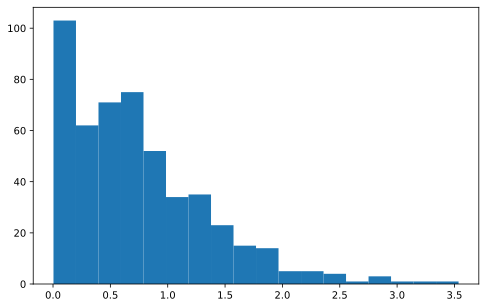

25%:  0.26062773492790353
50%:  0.6406747395054976
75%:  1.0428621497802357


In [110]:
n = 1000
mu, sigma = 0, 1.
x = np.random.default_rng().normal(mu, sigma, size=n)
x = x[x > 0]
plt.hist(x, bins="auto")
plt.show()
print("25%: ", np.quantile(x, 0.25))
print("50%: ", np.quantile(x, 0.50))
print("75%: ", np.quantile(x, 0.75))

In [49]:
import numpy as np
n = 5
a = np.hstack((np.flip(np.arange(1,n+1)), np.arange(2,n+1)))
b = np.hstack((np.flip(np.arange(1,n+1)), np.arange(2,n+1)))
b[np.where(b == 1)] = 0
m = np.diag(a) + np.rot90(np.diag(b))
m[np.triu_indices(n,1)] = 1
m = np.flip(m, 1)
m[np.triu_indices(n,1)] = 1
m = np.flip(m, 0)
m[np.triu_indices(n,1)] = 1
m = np.flip(m, 1)
m[np.triu_indices(n,1)] = 1
np.rot90(m)

array([[5, 0, 0, 0, 0, 0, 0, 0, 5],
       [1, 4, 0, 0, 0, 0, 0, 4, 1],
       [1, 1, 3, 0, 0, 0, 3, 1, 1],
       [1, 1, 1, 2, 0, 2, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 2, 0, 2, 1, 1, 1],
       [1, 1, 3, 0, 0, 0, 3, 1, 1],
       [1, 4, 0, 0, 0, 0, 0, 4, 1],
       [5, 0, 0, 0, 0, 0, 0, 0, 5]])